In [2]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import cross_validation

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


df=pd.read_csv(r'C:\Users\Priti\Desktop\ant-1.3.csv')
df.head()

In [3]:
df=pd.read_csv(r'E:\ant-1.3.csv')
df.head()
fdf=pd.DataFrame([df.wmc,df.dit,df.noc,df.cbo,df.rfc,df.lcom]).T
fdf.describe()

,wmc,dit,noc,cbo,rfc,lcom
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,10.592000,2.280000,0.576000,10.432000,34.368000,69.320000
std,10.364406,1.280121,3.250965,14.891184,29.020998,259.281532
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,4.000000,15.000000,1.000000
50%,8.000000,2.000000,0.000000,7.000000,28.000000,6.000000
75%,14.000000,3.000000,0.000000,10.000000,46.000000,44.000000
max,71.000000,6.000000,34.000000,103.000000,186.000000,2247.000000


In [4]:
def normalize(X):
    return (X-np.min(X))/(np.max(X)-np.min(X))

normalised_df=fdf.apply(normalize)
normalised_df.describe()


,wmc,dit,noc,cbo,rfc,lcom
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.149183,0.256000,0.016941,0.101282,0.184774,0.030850
std,0.145978,0.256024,0.095617,0.144575,0.156027,0.115390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.056338,0.000000,0.000000,0.038835,0.080645,0.000445
50%,0.112676,0.200000,0.000000,0.067961,0.150538,0.002670
75%,0.197183,0.400000,0.000000,0.097087,0.247312,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
target=df.bug
target

0      0
1      2
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      1
10     0
11     1
12     0
13     2
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     3
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
95     0
96     0
97     0
98     0
99     0
100    1
101    0
102    1
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    1
115    0
116    0
117    0
118    0
119    0
120    0
121    0
122    2
123    0
124    0
Name: bug, Length: 125, dtype: int64

In [6]:
set(target)

{0, 1, 2, 3}

In [14]:
#multiple linear regression using linear model
len(df)
raw_data=np.asmatrix(normalised_df)
#X_train=raw_data.reshape(-1,6)
#X_train
lm=linear_model.LinearRegression()
lm.fit(normalised_df,target)
lm.coef_
lm.residues_


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


45.779382875604597

In [15]:
x_train, x_test,y_train,y_test=cross_validation.train_test_split(normalised_df, target, test_size=0.4, random_state=1)
lm.fit(x_train, y_train)
lm.coef_


array([-1.21160104, -0.40012505,  1.57961045, -0.02544877,  4.31783698,
       -2.5092072 ])

In [40]:
A=lm.predict(x_test)
A
np.shape(A)

(50L,)

In [61]:
y_test
np.shape(y_test)
z=A-y_test
c=np.mean(z)**2/len(y_test)
c

1.4600383086630354e-08

In [11]:
#logistic regression
from sklearn import linear_model
lg=linear_model.LogisticRegression()
lg.fit(normalised_df,target)
lg.classes_
lg.coef_
P=lg.predict(normalised_df)
P

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
#target

In [30]:
results=P==target
#print(results)
results=list(results)
results.count(True)/len(results)*100


84.8

In [31]:
S=target>0
S1=[]
for i in S:
    if(i==True):
        S1.append(1)
    else:
        S1.append(0)
#S1        

In [32]:
from sklearn import linear_model
lg=linear_model.LogisticRegression()
lg.fit(normalised_df,S1)
lg.classes_
lg.coef_
P=lg.predict(normalised_df)
P

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [33]:
results=P==S1
#print(results)
results=list(results)
results.count(True)/len(results)*100


84.0

In [34]:
#knn
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
knn.fit(normalised_df, target)
knn_p=knn.predict(normalised_df)



In [35]:
results1=knn_p==target
results1=list(results1)
results1.count(True)/len(results1)*100

84.8

In [36]:
#random forest
from sklearn import ensemble
rf=ensemble.RandomForestClassifier()
rf.fit(normalised_df,target)
rf_p=rf.predict(normalised_df)
rf_p


array([0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int64)

In [37]:
results2=rf_p==target
results2=list(results2)
results2.count(True)/len(results2)*100

96.8

In [38]:
#navie bayes
from sklearn import naive_bayes
nv=naive_bayes.GaussianNB()
nv.fit(normalised_df,target)
nv_p=nv.predict(normalised_df)
nv_p

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 3, 0, 0, 2, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 2], dtype=int64)

In [39]:
results3=nv_p==target
results3=list(results3)
results3.count(True)/len(results3)*100

71.2

In [40]:
#svm linear classifier
from sklearn import svm
R=svm.SVC(kernel='linear')
R.fit(normalised_df,target)
R_p=R.predict(normalised_df)
R_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
results4=R_p==target
results4=list(results4)
results4.count(True)/len(results4)*100

84.0

In [58]:
#neauran network
from sklearn import neural_network
nn=neural_network.MLPClassifier()
nn.fit(normalised_df, target)
nn_p=nn.predict(x_test)
nn_p

C:\Users\Priti\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [57]:
results5=nn_p==target
results5=list(results5)
results5.count(True)/len(results5)*100

ValueError: Lengths must match to compare

In [54]:
y_test

74     3
45     0
48     0
31     0
65     2
66     0
118    0
100    1
115    0
33     0
62     0
44     0
105    0
104    0
119    0
106    0
35     0
103    0
122    2
2      0
53     3
123    0
110    0
56     0
90     1
51     0
83     0
17     0
95     0
78     1
46     0
69     0
42     0
54     0
102    1
117    0
55     0
99     0
116    0
73     0
10     0
59     0
32     0
82     0
38     0
19     0
124    0
27     0
36     1
58     0
Name: bug, dtype: int64

In [59]:
S1

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [60]:
#implementation of neural network
np.shape(normalised_df).T

(125, 6)

In [69]:
trans_norm=normalised_df.T
#np.shape(trans_norm)
trans_norm=np.asmatrix(trans_norm)
np.shape(trans_norm)

(6, 125)

In [65]:
trans_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
wmc,0.154930,0.197183,0.042254,0.169014,0.084507,0.070423,0.056338,0.225352,0.056338,0.239437,...,0.042254,0.267606,0.098592,0.056338,0.112676,0.915493,0.197183,0.197183,0.056338,0.380282
dit,0.600000,0.000000,0.200000,0.400000,0.400000,0.000000,0.600000,0.400000,0.800000,0.400000,...,0.200000,0.000000,0.600000,0.400000,0.600000,0.400000,0.600000,0.000000,0.200000,0.000000
noc,0.058824,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cbo,0.135922,0.077670,0.009709,0.116505,0.038835,0.029126,0.058252,0.029126,0.048544,0.097087,...,0.077670,0.757282,0.106796,0.058252,0.058252,0.203883,0.961165,0.233010,0.029126,0.029126
rfc,0.225806,0.172043,0.048387,0.198925,0.112903,0.080645,0.172043,0.215054,0.112903,0.295699,...,0.096774,0.123656,0.172043,0.080645,0.188172,0.833333,0.150538,0.338710,0.086022,0.338710


In [89]:
Weight1=np.random.rand(6,6)
#Weight1
Weight2=np.random.rand(6,1)
Weight2

array([[ 0.17619536],
       [ 0.22715885],
       [ 0.45290625],
       [ 0.43126307],
       [ 0.72875271],
       [ 0.45584814]])

In [72]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [73]:
temp=trans_norm[:,0]
temp

matrix([[ 0.15492958],
        [ 0.6       ],
        [ 0.05882353],
        [ 0.13592233],
        [ 0.22580645],
        [ 0.0129061 ]])

In [74]:
np.shape(temp)

(6, 1)

In [87]:
layer1=np.dot(temp.T,Weight1)

In [88]:
layer1_output=sigmoid(layer1)
layer1_output

matrix([[ 0.62750711,  0.67668099,  0.63359338,  0.64119851,  0.67347098,
          0.63071473]])

In [91]:
layer2=np.dot(temp.T,Weight2)
layer2

matrix([[ 0.4192933]])

In [92]:
layer2_output=sigmoid(layer2)
layer2_output

matrix([[ 0.60331413]])

In [93]:
S1[0]

0

In [97]:

def sigmoid(x):
    return (1/(1+np.exp(-x)))
trans_norm=normalised_df.T
#np.shape(trans_norm)
trans_norm=np.asmatrix(trans_norm)
np.shape(trans_norm)

Weight1=np.random.rand(6,6)

Weight2=np.random.rand(6,1)

temp=trans_norm[:,0].T

for i in range(0,1):
    l1_output=sigmoid(np.dot(temp,Weight1))
    l2_output=sigmoid(np.dot(l1_output,Weight2))
    error=(0.5*(S1[0]-l2_output)**2)
print(error)
    

[[ 0.40573807]]


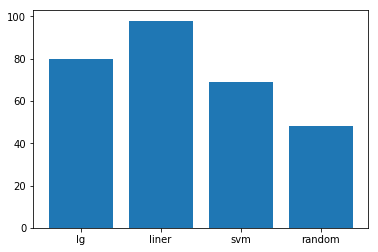

In [79]:
import matplotlib.pyplot as plt
objects = ('lg', 'liner', 'svm', 'random')
y_pos = np.arange(len(objects))
performance = [80,98,69,48]
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.show()